In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline
from datetime import datetime, timedelta

file = "D:/astro/domecam/together.xlsx"
df = pd.read_excel(file)
save_dir = 'D:/astro/phys_and_output/'

seeing_label = "Качество изображения (уг. сек.)"
var_label = "Дисперсия (м/с)"
delta_T_out_in = "∆T(out-in) (градусы)"
wind_speed_label = "Скорость ветра (м/с)"
delta_T_in_mir = "∆T(in-mir) (градусы)"

font_size = 14 # размер шрифтов
var_lim = 0.5 # ограничение на отображение по дисперсии
alpha_value = 0.8 # прозрачность точек на графике

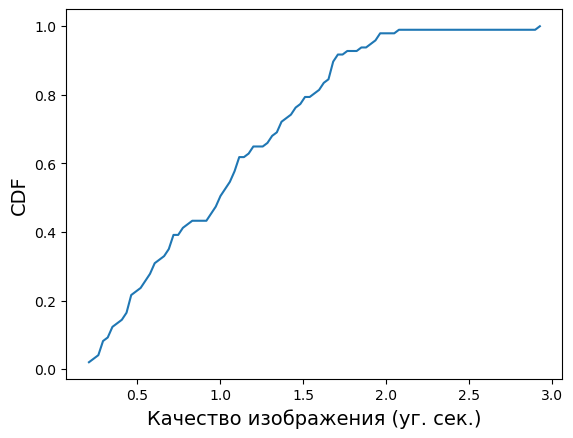

In [2]:
count, bins_count = np.histogram(df['seeing'], bins=len(df['seeing']))
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
plt.plot(bins_count[1:], cdf) 
plt.xlabel(seeing_label, size=font_size)
plt.ylabel("CDF", size=font_size)
plt.savefig(f'{save_dir}cumprob.png', bbox_inches='tight')

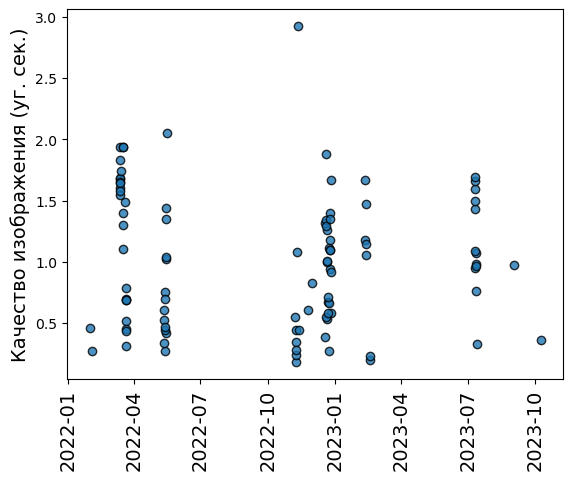

In [3]:
file_date = []
file_date_month_only = []
for item in df['file']:
    file_time = datetime.strptime(item.replace('DC', '').replace('_2km.fits',''), '%y%m%d%H%M%S')
    file_date.append(f'{file_time.day} {file_time.strftime("%b")} {file_time.year}')
    file_date_month_only.append(f'{file_time.strftime("%b")} {file_time.year}')

df2 = df.assign(file_date=file_date)
df2 = df2.assign(month_only=file_date_month_only)

df2['file_date'] = pd.to_datetime(df2['file_date'], format='%d %b %Y')

ax = plt.gca()
ax.scatter(df2['file_date'], df2["seeing"], edgecolor='black', alpha=alpha_value)
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3))) # шаг по месяцам
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # формат отображения даты
    
plt.setp(ax.get_xticklabels(), rotation=90, size=font_size) 
plt.ylabel(seeing_label, size=font_size)
plt.savefig(f'{save_dir}seeings.png', bbox_inches='tight')
plt.show()

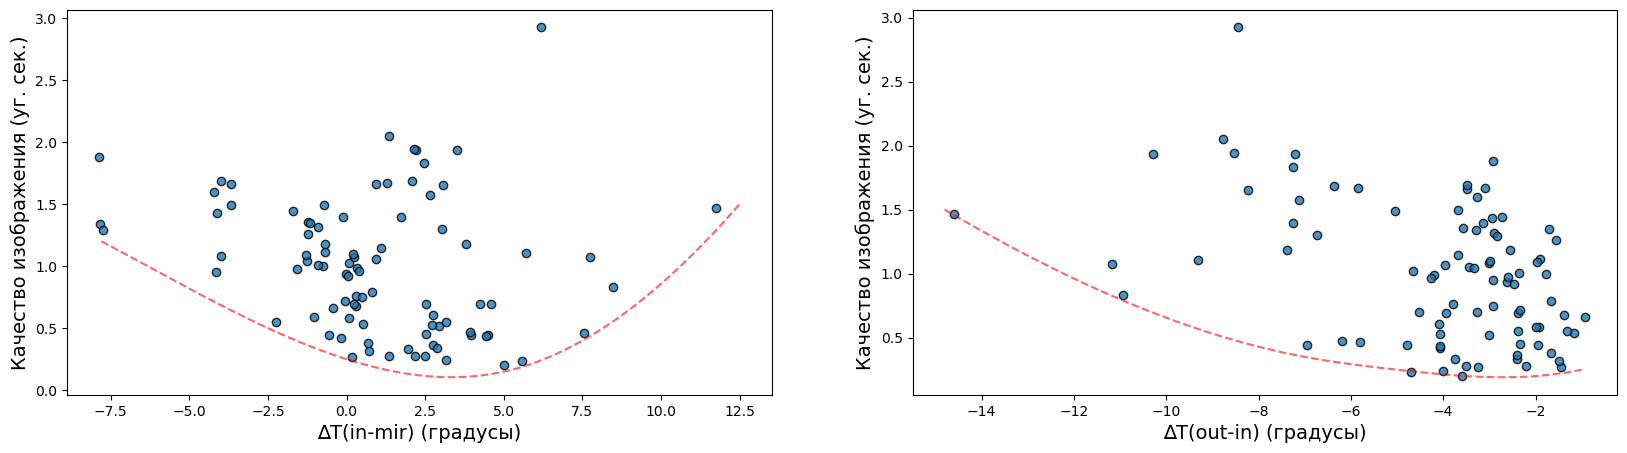

In [5]:
mirror_temperature = (df['ts_1'] + df['ts_2'] + df['ts_3'])/3
indoor_temperuature = (df['ts_15'] + df['ts_17'] + df['ts_19'])/3
outdoor_temperuature = df['temperature']

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax.scatter(indoor_temperuature - mirror_temperature, df['seeing'], edgecolor='black', alpha=alpha_value)
ax.set_ylabel(seeing_label, size=font_size)
ax.set_xlabel(delta_T_in_mir, size=font_size)

xx = [-7.8, -2.5, 0, 5, 7.5, 12.5]
yy = [1.2, 0.5, 0.25, 0.15, 0.4, 1.5]
xnew = np.linspace(np.min(xx), np.max(xx), 200) 
spl = make_interp_spline(xx, yy, k=3)
y_smooth = spl(xnew)
ax.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

ax2.scatter(outdoor_temperuature - indoor_temperuature, df['seeing'], edgecolor='black', alpha=alpha_value)
ax2.set_ylabel(seeing_label, size=font_size)
ax2.set_xlabel(delta_T_out_in, size=font_size)

xx2 = [-14.8, -11, -7, -5, -3.5, -1.0]
yy2 = [1.5, 0.8, 0.35, 0.25, 0.2, 0.25]
xnew2 = np.linspace(np.min(xx2), np.max(xx2), 200) 
spl2 = make_interp_spline(xx2, yy2, k=3)
y_smooth2 = spl2(xnew2)
ax2.plot(xnew2, y_smooth2, color='red', ls='--', alpha=0.6)

fig.savefig(f'{save_dir}seeing.png', bbox_inches='tight')

In [6]:
print(f"percentile 20, 80: {np.percentile(df['seeing'], [20, 80])}")
print(f"min: {np.min(df['seeing'])}, max: {np.max(df['seeing'])}")
print(f"median: {np.median(df['seeing'])}, mean: {np.mean(df['seeing'])}")

print(df['seeing'].sort_values())
print('Внутри-Главное зеркало ∆T (градусы)', (indoor_temperuature - mirror_temperature)[38])
print('Снаружи-Внутри ∆T (градусы):', (outdoor_temperuature - indoor_temperuature)[38])

percentile 20, 80: [0.45498 1.53836]
min: 0.182, max: 2.9247
median: 0.9985, mean: 1.0092999999999999
16    0.1820
38    0.1996
72    0.2355
41    0.2408
54    0.2714
       ...  
2     1.9349
10    1.9379
26    1.9397
45    2.0517
12    2.9247
Name: seeing, Length: 97, dtype: float64
Внутри-Главное зеркало ∆T (градусы) 5.0
Снаружи-Внутри ∆T (градусы): -3.596666666666668


In [ ]:
df = df.assign(errorCn2 = df['Cn2 error']/df['Cn2'])
df.to_excel("D:/astro/domecam/together2.xlsx")

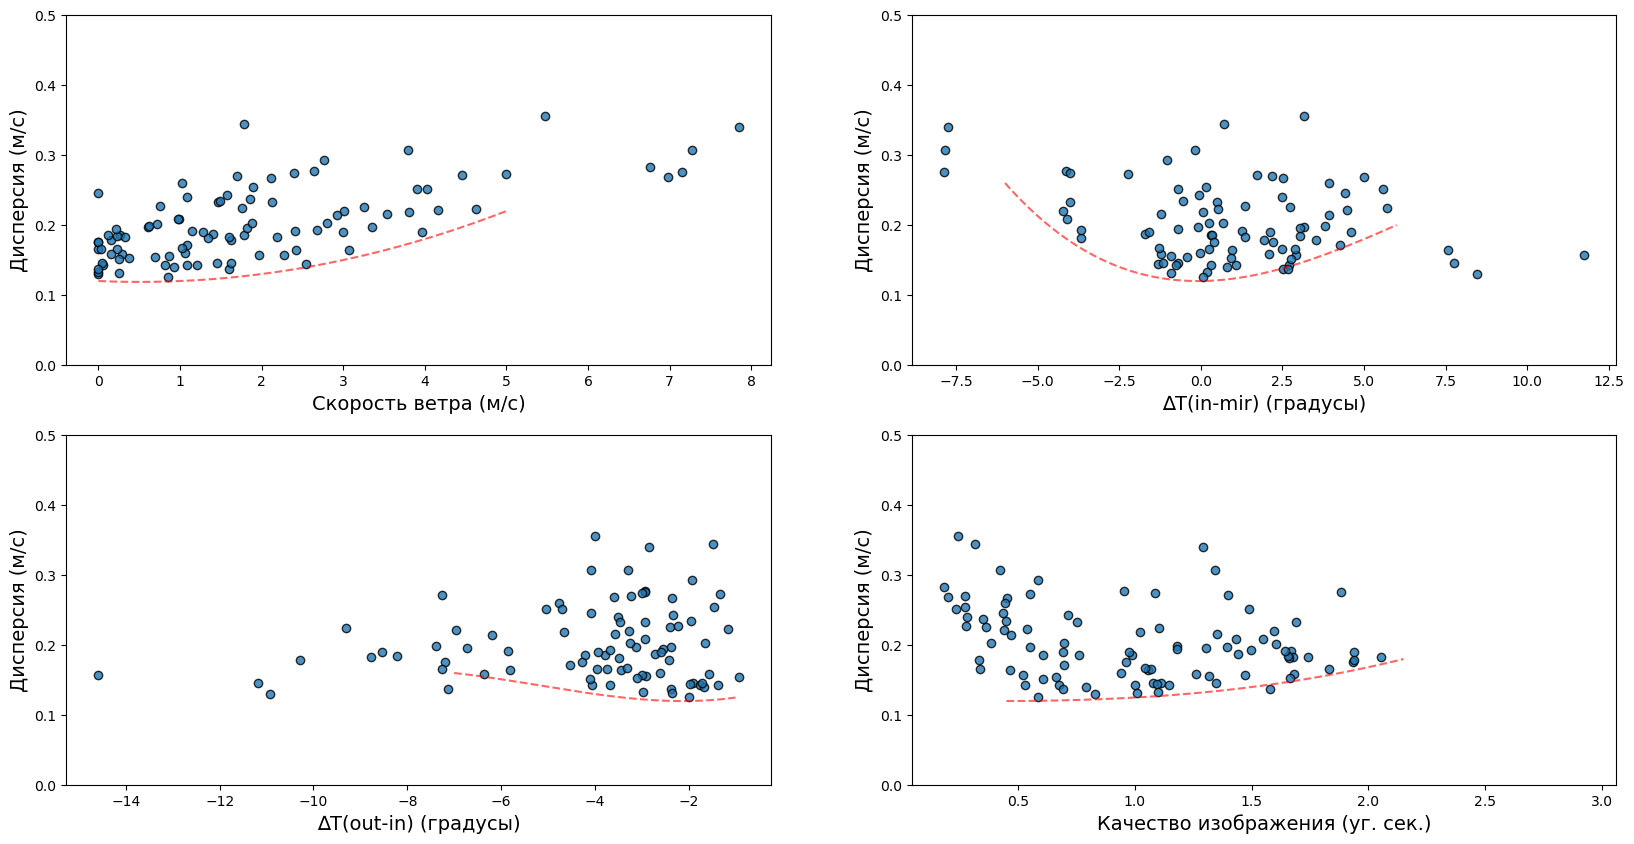

In [6]:
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax.scatter(df['wind speed'], df['var, m/s'], edgecolor='black', alpha=alpha_value)
ax.set_ylabel(var_label, size=font_size)
ax.set_xlabel(wind_speed_label, size=font_size)
ax.set_ylim(0, var_lim)

xx = [0, 1, 3, 5]
yy = [0.12, 0.12, 0.15, 0.22]
xnew = np.linspace(np.min(xx), np.max(xx), 200) 
spl = make_interp_spline(xx, yy, k=3)
y_smooth = spl(xnew)
ax.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

ax2.scatter(indoor_temperuature - mirror_temperature, df['var, m/s'], edgecolor='black', alpha=alpha_value)
ax2.set_ylabel(var_label, size=font_size)
ax2.set_xlabel(delta_T_in_mir, size=font_size)
ax2.set_ylim(0, var_lim)

xx = [-6, -3, 0, 6]
yy = [0.26, 0.15, 0.12, 0.2]
xnew = np.linspace(np.min(xx), np.max(xx), 200) 
spl = make_interp_spline(xx, yy, k=3)
y_smooth = spl(xnew)
ax2.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

ax3.scatter(outdoor_temperuature - indoor_temperuature, df['var, m/s'], edgecolor='black', alpha=alpha_value)
ax3.set_ylabel(var_label, size=font_size)
ax3.set_xlabel(delta_T_out_in, size=font_size)
ax3.set_ylim(0, var_lim)

xx = [-7, -4, -2, -1]
yy = [0.16, 0.13, 0.12, 0.125]
xnew = np.linspace(np.min(xx), np.max(xx), 200) 
spl = make_interp_spline(xx, yy, k=3)
y_smooth = spl(xnew)
ax3.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

ax4.scatter(df['seeing'], df['var, m/s'], edgecolor='black', alpha=alpha_value)
ax4.set_ylabel(var_label, size=font_size)
ax4.set_xlabel(seeing_label, size=font_size)
ax4.set_ylim(0, var_lim)

xx = [0.45, 1, 1.5, 2.15]
yy = [0.12, 0.125, 0.14, 0.18]
xnew = np.linspace(np.min(xx), np.max(xx), 200) 
spl = make_interp_spline(xx, yy, k=3)
y_smooth = spl(xnew)
ax4.plot(xnew, y_smooth, color='red', ls='--', alpha=0.6)

fig.savefig(f'{save_dir}variance.png', bbox_inches='tight')

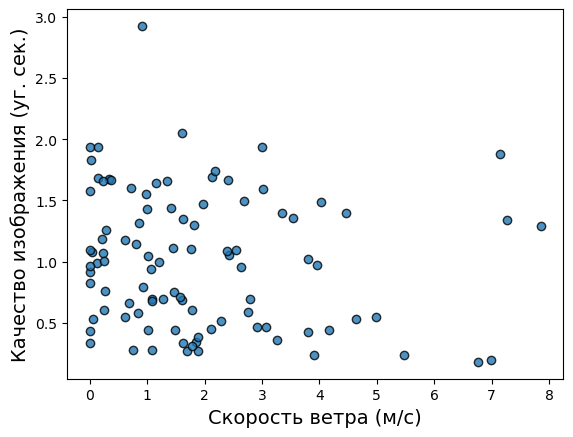

In [7]:
plt.figure()

plt.scatter(df['wind speed'], df['seeing'], edgecolor='black', alpha=alpha_value)
plt.ylabel(seeing_label, size=font_size)
plt.xlabel(wind_speed_label, size=font_size)

plt.savefig(f'{save_dir}seeing_windspeed.png', bbox_inches='tight')